In [3]:
#import mnist
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
#normalize
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [4]:
#create generator model
def generator_model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(units=7*7*256, input_dim=100))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Reshape(target_shape=(7,7,256)))
    model.add(tf.keras.layers.Conv2DTranspose(filters=64, kernel_size=4, strides=2, padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=4, strides=2, padding='same'))
    model.add(tf.keras.layers.Activation('tanh'))
    return model

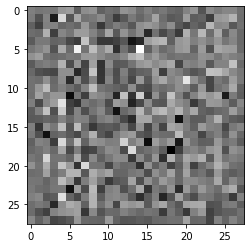

In [5]:
#generator model
generator=generator_model()
data=tf.random.normal([1,100])
generated_image=generator(data)
import matplotlib.pyplot as plt
plt.imshow(generated_image[0,:,:,0], cmap='gray')

In [19]:
#create discriminator model
def discriminator_model():
    model=tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=4, strides=2, padding='same', input_shape=[28, 28, 1]))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=4, strides=2, padding='same'))
    model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=1))
    return model

In [20]:
#discriminative model
discriminator=discriminator_model()
decision=discriminator(generated_image)
print(decision)

tf.Tensor([[-0.00030774]], shape=(1, 1), dtype=float32)


In [21]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [22]:
#train
def train(dataset,epoch):
    noise = tf.random.normal([128, 100])
    for epoch in range(epoch):
        start=0
        for image_batch in dataset:
            #discriminator train
            with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
                generated_images=generator(noise, training=True)
                real_output=discriminator(image_batch, training=True)
                fake_output=discriminator(generated_images, training=True)
                gen_loss=generator_loss(fake_output)
                disc_loss=discriminator_loss(real_output, fake_output)
            gradients_of_generator=gen_tape.gradient(gen_loss, generator.trainable_variables)
            gradients_of_discriminator=disc_tape.gradient(disc_loss, discriminator.trainable_variables)
            generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
            discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
            start+=1
      
        generated_image=generator(data)
        plt.imshow(generated_image[0,:,:,0], cmap='gray')
        plt.show()
   
